<a href="https://colab.research.google.com/github/SriNihitha12/BigdataProject/blob/main/Traffic_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pandas matplotlib scikit-learn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Change this path to your exact file location
data_path = '/content/drive/MyDrive/TrafficData/Minnesota_TrafficData_2020-24.csv'

# Load the data
df = pd.read_csv(data_path)

# Show first few rows
df.head()


,station_id,dir_of_travel,lane_of_travel,date,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,24
0,26,1,1,2024-01-01,71,57,40,37,59,54,...,593,571,556,459,388,328,230,165,122,97
1,26,1,2,2024-01-01,11,5,3,2,4,4,...,317,336,281,247,164,91,63,53,14,18
2,26,5,1,2024-01-01,116,57,39,35,49,72,...,602,571,414,380,288,240,187,122,95,59
3,26,5,2,2024-01-01,19,2,7,3,4,9,...,382,302,189,135,102,69,50,30,13,6
4,26,1,1,2024-01-02,72,72,54,93,116,196,...,476,437,468,377,297,247,188,191,140,124


In [ ]:
# Drop fully empty rows
df.dropna(how='all', inplace=True)

# Optional: Display columns to verify structure
print(df.columns)


Index(['station_id', 'dir_of_travel', 'lane_of_travel', 'date', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')


In [ ]:
# Convert hour columns ('1' to '24') into rows
hourly_df = df.melt(
    id_vars=['station_id', 'dir_of_travel', 'lane_of_travel', 'date'],
    value_vars=[str(i) for i in range(1, 25)],
    var_name='hour',
    value_name='volume'
)

# Convert to proper datetime format
hourly_df['datetime'] = pd.to_datetime(hourly_df['date']) + pd.to_timedelta(hourly_df['hour'].astype(int) - 1, unit='h')

# Sort by time
hourly_df.sort_values('datetime', inplace=True)
hourly_df.reset_index(drop=True, inplace=True)

# Drop missing or invalid volume entries
hourly_df = hourly_df[hourly_df['volume'].notnull()]

# Check the structure
hourly_df.head()


,station_id,dir_of_travel,lane_of_travel,date,hour,volume,datetime
0,11280,1,2,2020-01-01,1,302,2020-01-01
1,220,5,1,2020-01-01,1,4,2020-01-01
2,405,1,1,2020-01-01,1,632,2020-01-01
3,11464,1,3,2020-01-01,1,22,2020-01-01
4,4741,1,1,2020-01-01,1,91,2020-01-01


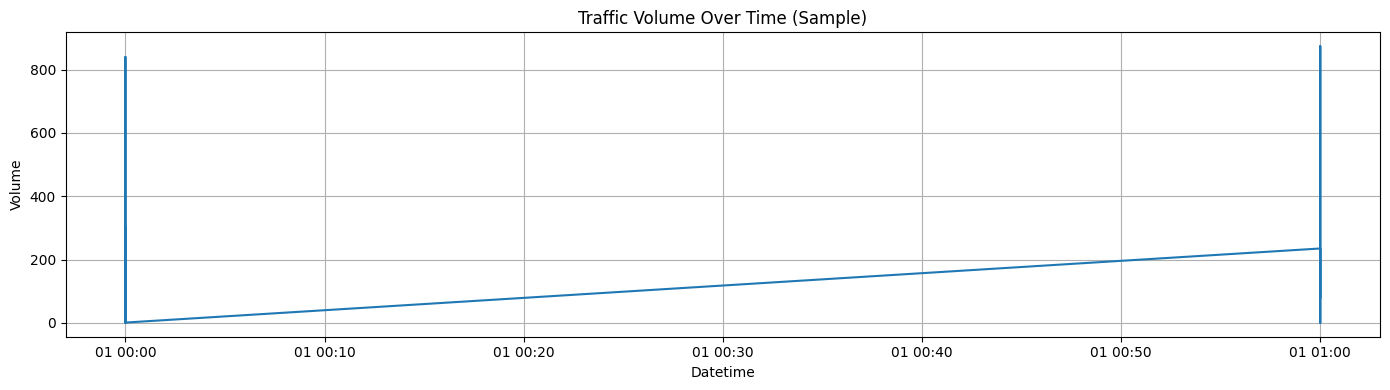

In [ ]:
import matplotlib.pyplot as plt

# Plot sample volume trend
plt.figure(figsize=(14, 4))
plt.plot(hourly_df['datetime'][:500], hourly_df['volume'][:500])
plt.title("Traffic Volume Over Time (Sample)")
plt.xlabel("Datetime")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
hourly_df['hour'] = hourly_df['datetime'].dt.hour
hourly_df['weekday'] = hourly_df['datetime'].dt.weekday
hourly_df['month'] = hourly_df['datetime'].dt.month

# Features and target
features = hourly_df[['hour', 'weekday', 'month']]
target = hourly_df['volume']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(" Mean Squared Error:", mse)
print(" LinearRegression RMSE:", rmse)


 Mean Squared Error: 174155.30187245598
 LinearRegression RMSE: 417.31918464462666


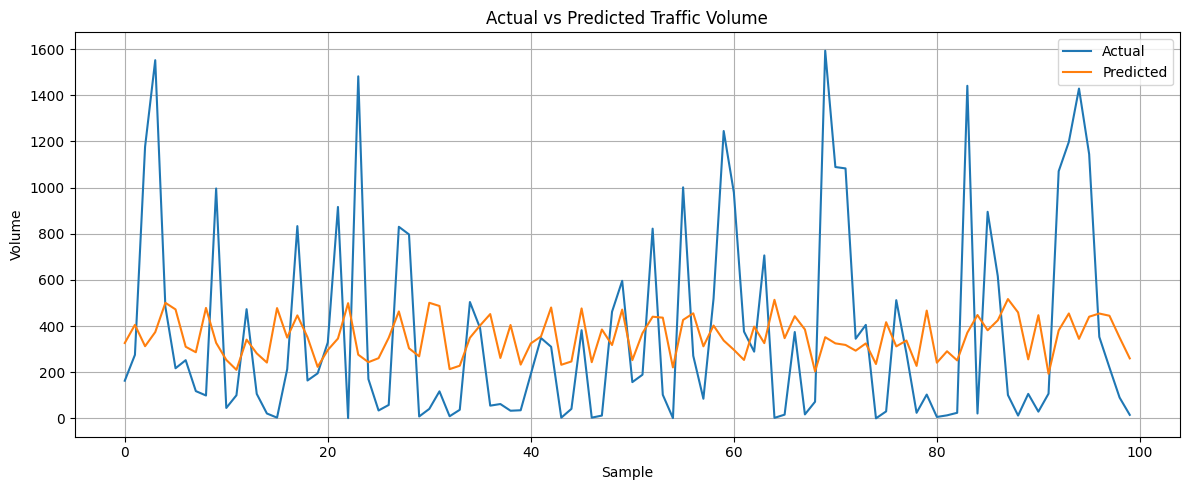

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Sample")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("RMSE (Random Forest):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


In [ ]:
!pip install pandas openpyxl



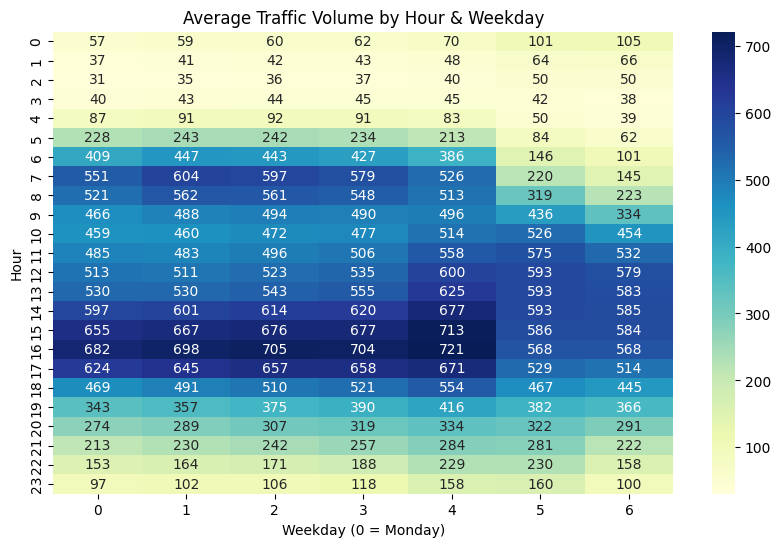

In [ ]:
pivot = hourly_df.pivot_table(values='volume', index='hour', columns='weekday', aggfunc='mean')
plt.figure(figsize=(10, 6))
plt.title("Average Traffic Volume by Hour & Weekday")
import seaborn as sns
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.show()


In [ ]:
# 1. Install XGBoost
!pip install xgboost

In [ ]:
# 2. Import necessary libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# 3. Create and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 4. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# 5. Evaluate the model using RMSE
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)

# Print RMSE
print(" XGBoost RMSE:", xgb_rmse)

 XGBoost RMSE: 363.6950130260243


In [ ]:
# Create a pivot table for heatmap visualization (Predicted volume)
predicted_pivot = pd.DataFrame(y_pred, columns=['Predicted'], index=X_test.index)
predicted_pivot['hour'] = X_test['hour']
predicted_pivot['weekday'] = X_test['weekday']
predicted_pivot = predicted_pivot.pivot_table(values='Predicted', index='hour', columns='weekday', aggfunc='mean')


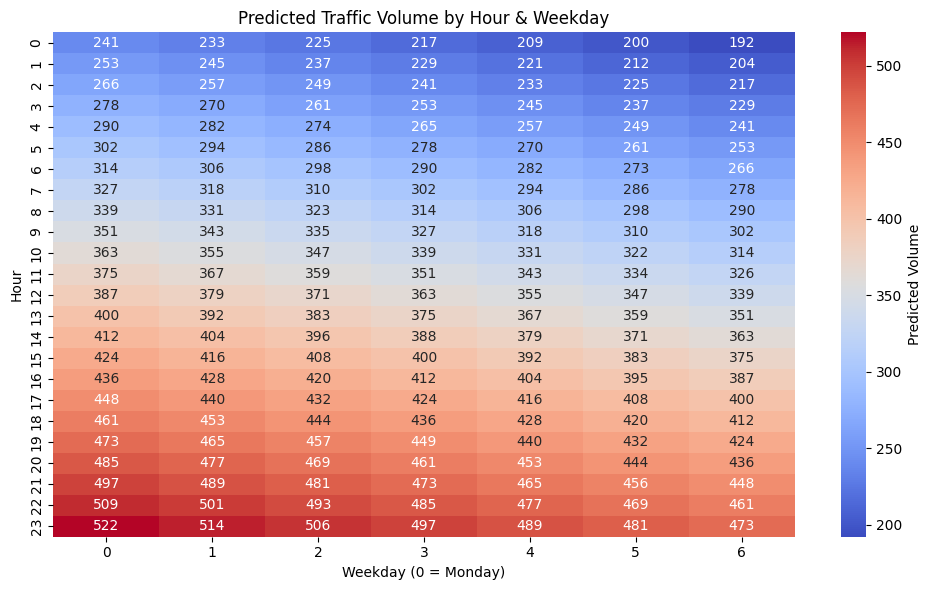

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(predicted_pivot, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Predicted Volume'})
plt.title("Predicted Traffic Volume by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()




In [ ]:
# STEP 1: Install CatBoost (if you're using Colab)
!pip install catboost

# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.6 MB/s eta 0:00:00


In [ ]:
# STEP 3: Load Dataset
data_path = '/content/drive/MyDrive/TrafficData/Minnesota_TrafficData_2020-24.csv'  # Update your path if needed
df = pd.read_csv(data_path)
df.dropna(how='all', inplace=True)

# STEP 4: Convert wide format to long format
id_vars = ['station_id', 'dir_of_travel', 'lane_of_travel', 'date']
value_vars = [str(i) for i in range(1, 25)]  # columns '1' to '24'

hourly_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars,
                    var_name='hour', value_name='volume')

# STEP 5: Extract datetime features
hourly_df['datetime'] = pd.to_datetime(hourly_df['date']) + pd.to_timedelta(hourly_df['hour'].astype(int) - 1, unit='h')
hourly_df['hour'] = hourly_df['datetime'].dt.hour
hourly_df['weekday'] = hourly_df['datetime'].dt.weekday
hourly_df['month'] = hourly_df['datetime'].dt.month
hourly_df.dropna(subset=['volume'], inplace=True)

In [ ]:
# STEP 6: Prepare Features
features = hourly_df[['hour', 'weekday', 'month']]
target = hourly_df['volume']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# STEP 7: Train CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)

# STEP 8: Predict and Evaluate
y_pred = cat_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(" CatBoost RMSE:", rmse)

 CatBoost RMSE: 363.472906937069


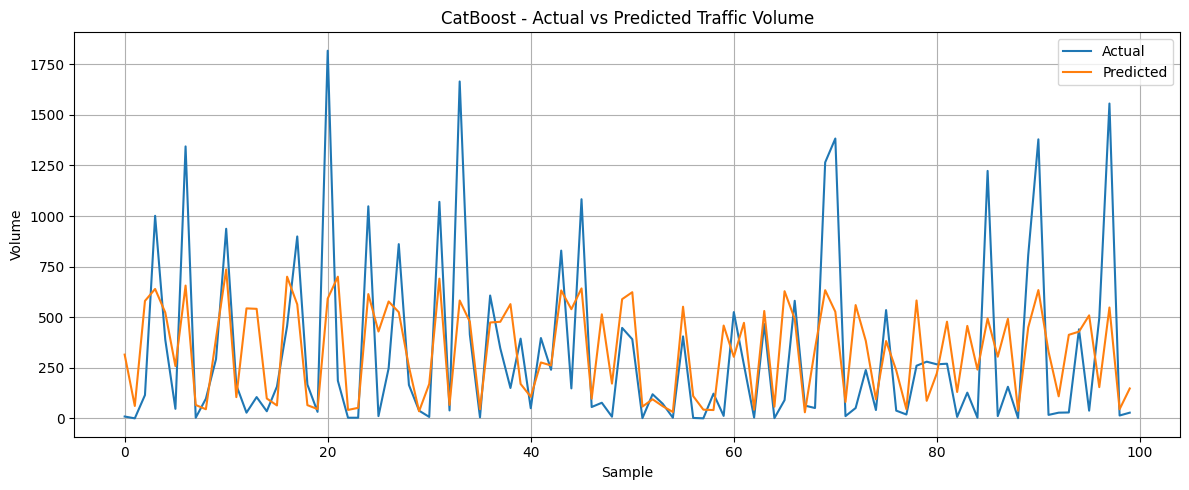

In [ ]:
# STEP 9: Prediction Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("CatBoost - Actual vs Predicted Traffic Volume")
plt.xlabel("Sample")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-47-13e0bbbe62b6>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_numeric = pivot_class.replace(class_to_num)


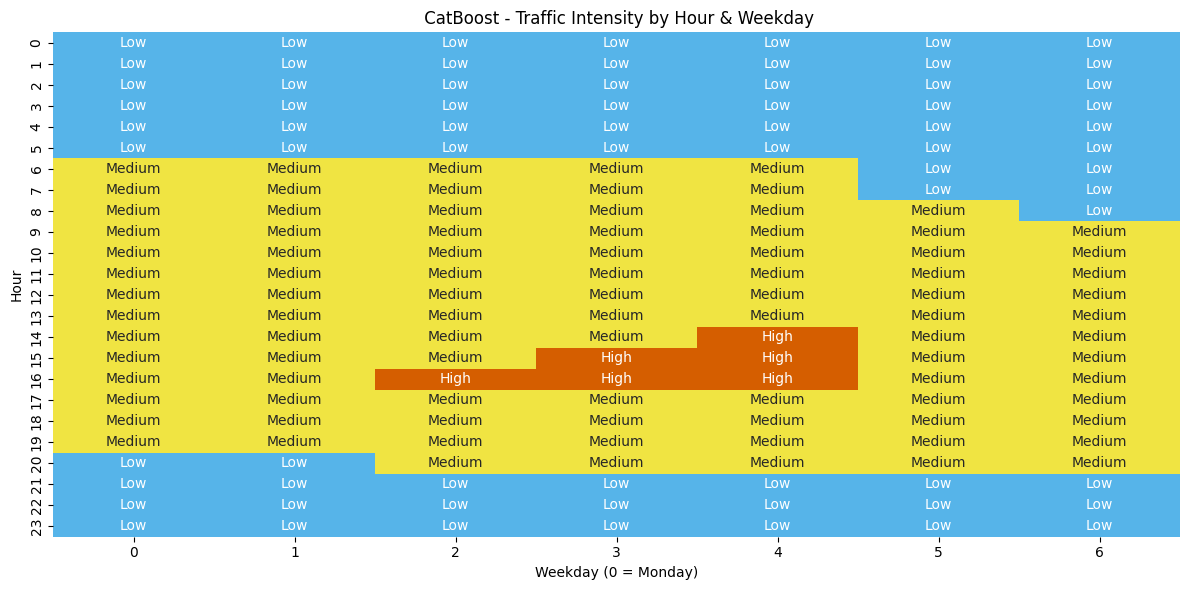

In [ ]:
# Create heatmap classification DataFrame
heatmap_df = pd.DataFrame({
    'Predicted': y_pred,
    'hour': X_test['hour'].values,
    'weekday': X_test['weekday'].values
})

# Classify traffic levels
def classify_traffic(volume):
    if volume < 300:
        return 'Low'
    elif volume < 700:
        return 'Medium'
    else:
        return 'High'

heatmap_df['Traffic_Level'] = heatmap_df['Predicted'].apply(classify_traffic)

# Create pivot table for heatmap
pivot_class = heatmap_df.pivot_table(
    values='Traffic_Level',
    index='hour',
    columns='weekday',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Low'
)

# Mapping classes to numeric values for color encoding
class_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
pivot_numeric = pivot_class.replace(class_to_num)

# Define color map for numeric encoding
cmap = ListedColormap(['#56B4E9', '#F0E442', '#D55E00'])  # Blue, Yellow, Red

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_numeric, cmap=cmap, annot=pivot_class, fmt='', cbar=False)
plt.title(" CatBoost - Traffic Intensity by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fistmf4/pvirgql7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fistmf4/o40xeol1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59992', 'data', 'file=/tmp/tmp4fistmf4/pvirgql7.json', 'init=/tmp/tmp4fistmf4/o40xeol1.json', 'output', 'file=/tmp/tmp4fistmf4/prophet_modelmlvvopas/prophet_model-20250423171959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


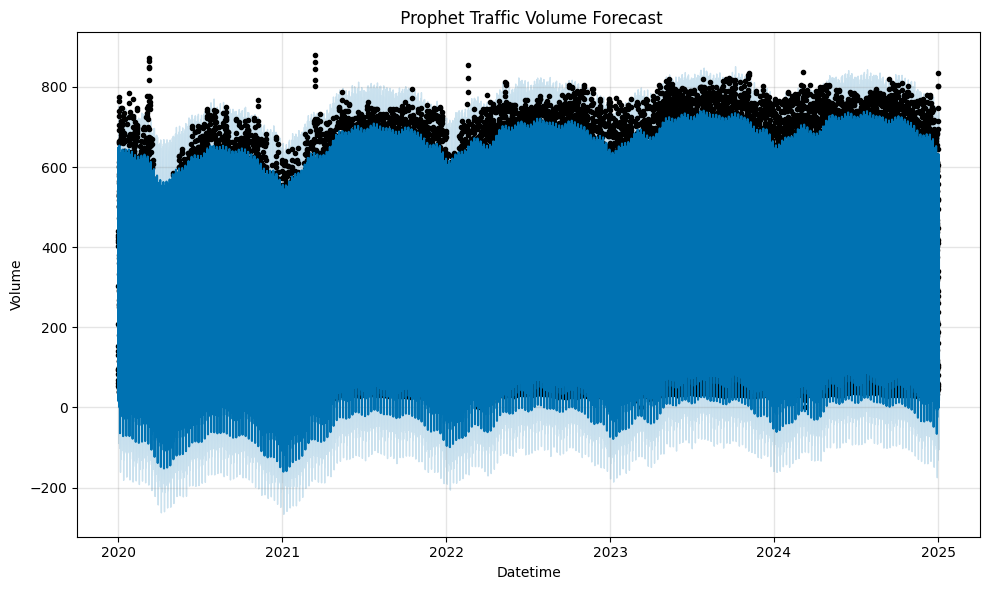

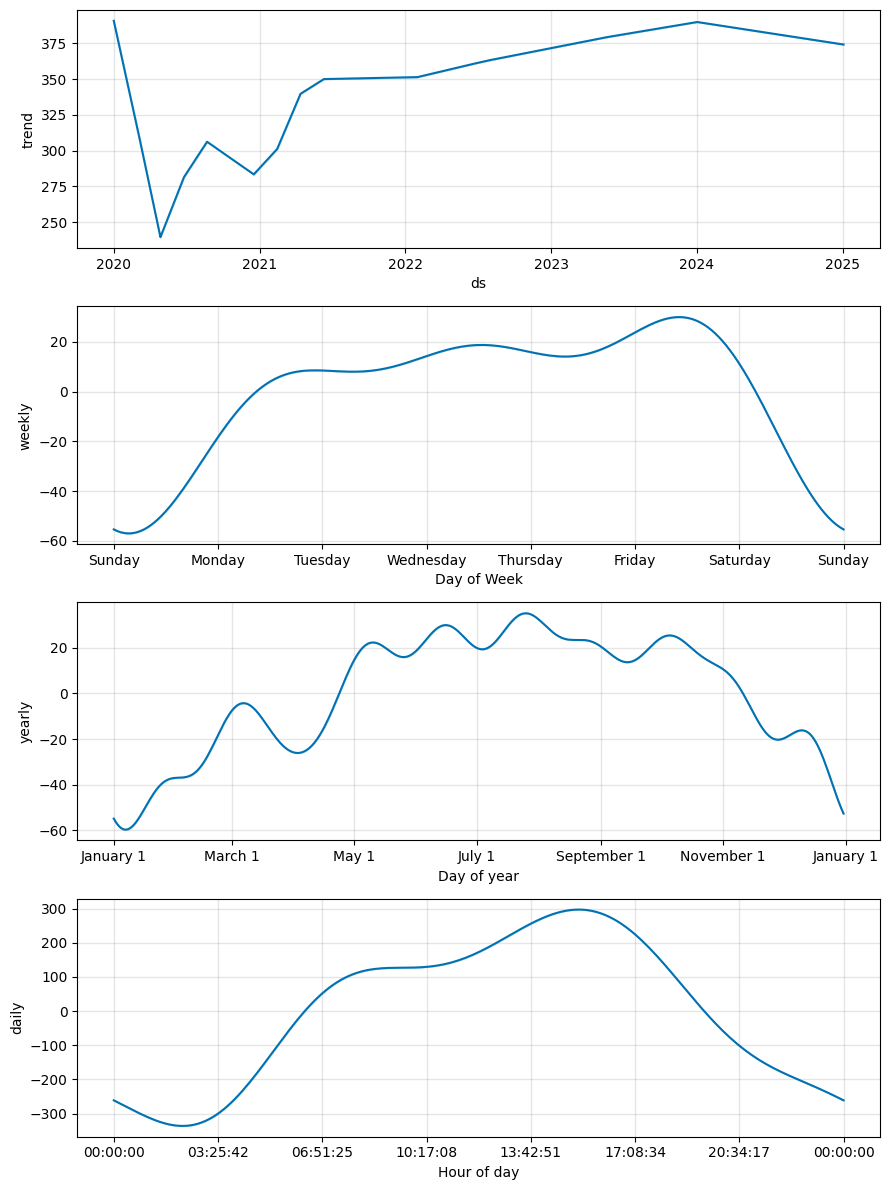

 Prophet RMSE: 80.57827892806492


<ipython-input-25-99875de292b5>:91: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_numeric = pivot.replace(traffic_map)


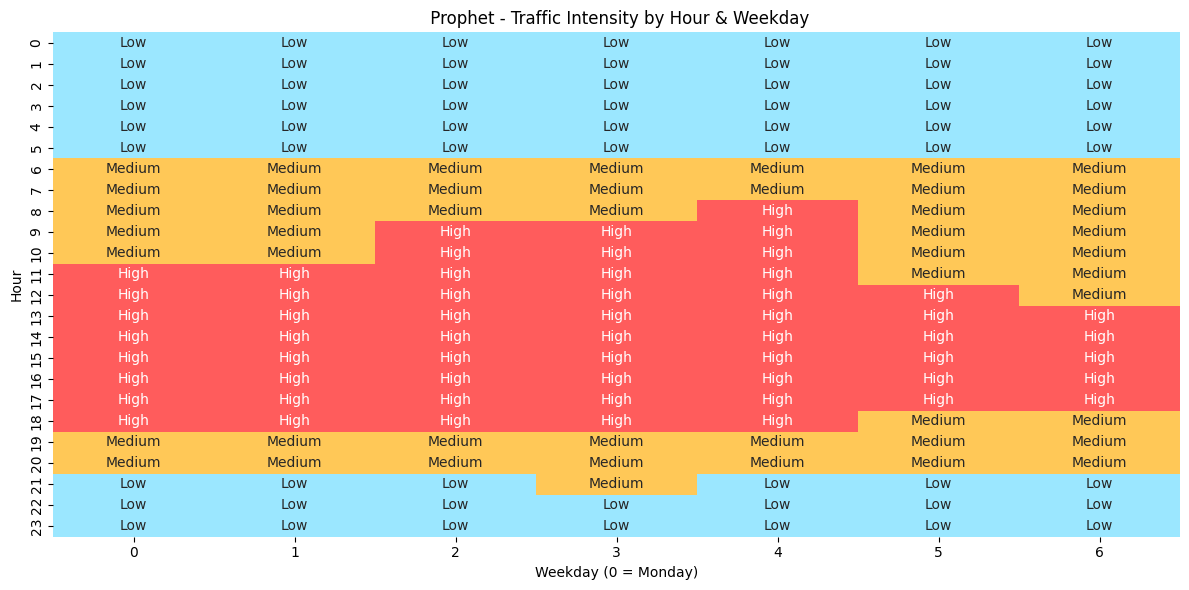

In [ ]:
# STEP 1: Install Prophet (if not already installed)
!pip install prophet --quiet

# STEP 2: Import Libraries
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# STEP 3: Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/TrafficData/Minnesota_TrafficData_2020-24.csv')
df.dropna(how='all', inplace=True)

# STEP 4: Convert Wide to Long
hourly_df = df.melt(
    id_vars=['station_id', 'dir_of_travel', 'lane_of_travel', 'date'],
    value_vars=[str(i) for i in range(1, 25)],
    var_name='hour',
    value_name='volume'
)

# STEP 5: Create Datetime Column
hourly_df['datetime'] = pd.to_datetime(hourly_df['date']) + pd.to_timedelta(hourly_df['hour'].astype(int) - 1, unit='h')
hourly_df.dropna(subset=['volume'], inplace=True)

# Extract hour and weekday for later heatmap classification
hourly_df['hour'] = hourly_df['datetime'].dt.hour
hourly_df['weekday'] = hourly_df['datetime'].dt.weekday

# STEP 6: Prepare Data for Prophet
prophet_df = hourly_df[['datetime', 'volume']].rename(columns={'datetime': 'ds', 'volume': 'y'})
prophet_df = prophet_df.groupby('ds').mean().reset_index()

# STEP 7: Fit the Prophet Model
model = Prophet()
model.fit(prophet_df)

# STEP 8: Forecast Future (48 hours)
future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

# STEP 9: Plot Forecast
model.plot(forecast)
plt.title(" Prophet Traffic Volume Forecast")
plt.xlabel("Datetime")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Forecast Components
model.plot_components(forecast)
plt.tight_layout()
plt.show()

# STEP 10: Calculate RMSE
actual = prophet_df['y'].values
predicted = model.predict(prophet_df)['yhat'].values
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(" Prophet RMSE:", rmse)

# STEP 11: Merge back predictions to add hour and weekday
forecast_trimmed = forecast[['ds', 'yhat']].copy()
forecast_trimmed['hour'] = forecast_trimmed['ds'].dt.hour
forecast_trimmed['weekday'] = forecast_trimmed['ds'].dt.weekday

# STEP 12: Classify Volume Levels
def classify_traffic(v):
    if v < 250:
        return 'Low'
    elif v < 500:
        return 'Medium'
    else:
        return 'High'

forecast_trimmed['Traffic_Level'] = forecast_trimmed['yhat'].apply(classify_traffic)

# STEP 13: Pivot Table for Heatmap
pivot = forecast_trimmed.pivot_table(
    values='Traffic_Level',
    index='hour',
    columns='weekday',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Low'
)

# STEP 14: Convert Categories to Numeric for Plotting
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
pivot_numeric = pivot.replace(traffic_map)

# Color map for 'Low', 'Medium', 'High'
color_map = {'Low': '#9be7ff', 'Medium': '#ffc857', 'High': '#ff5c5c'}
custom_cmap = ListedColormap([color_map['Low'], color_map['Medium'], color_map['High']])

# STEP 15: Plot Classification Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_numeric,
    cmap=custom_cmap,
    annot=pivot,
    fmt='',
    cbar=False
)
plt.title(" Prophet - Traffic Intensity by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Create and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluate the model
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE (Decision Tree Regressor):", rmse_dt)


RMSE (Decision Tree Regressor): 363.7045059261617


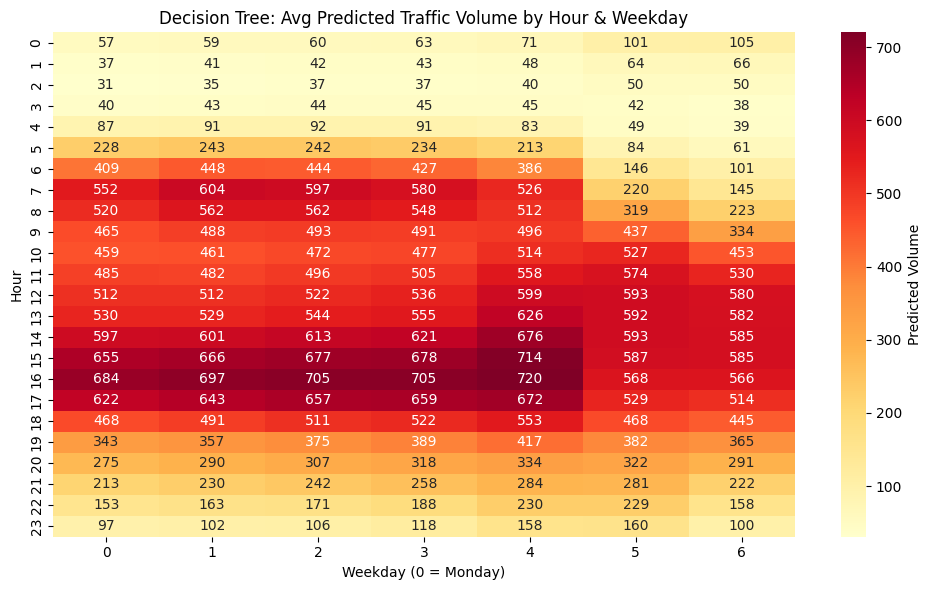

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Combine predictions and input features (X_test)
dt_heatmap_df = X_test.copy()
dt_heatmap_df['Predicted'] = y_pred_dt

# Create a pivot table: average predicted volume by hour & weekday
dt_pivot = dt_heatmap_df.pivot_table(
    values='Predicted',
    index='hour',
    columns='weekday',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dt_pivot, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Predicted Volume'})
plt.title("Decision Tree: Avg Predicted Traffic Volume by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()